# Bicycle Rentals

In [ ]:
options("scipen"=100, "digits"=4)

if(!require("rpart")) install.packages("rpart")
if(!require("rpart.plot")) install.packages("rpart.plot")
if(!require("Metrics")) install.packages("Metrics")
library("rpart")
library("rpart.plot")
library("Metrics")

## Training Data

So here is the data we have, this will be our training data:

| ID  | Season | WorkDay | Rentals |
|-----|--------|---------|---------|
| 1   | winter | false   | 800     |
| 2   | winter | false   | 826     |
| 3   | winter | true    | 900     |
| 4   | spring | false   | 2100    |
| 5   | spring | true    | 4740    |
| 6   | spring | true    | 4900    |
| 7   | summer | false   | 3000    |
| 8   | summer | true    | 5800    |
| 9   | summer | true    | 6200    |
| 10  | autumn | false   | 2901    |
| 11  | autumn | false   | 2880    |
| 12  | autumn | true    | 2820    |

-   `Rentals` is our result or outcome
-   `Season`, `Workday` are the predictors

This data is from a bicycle rental shop in different seasons and for
different kinds of days (work days vs weekends) This is different from a
“classification” situation since we are trying to predict and amount
(the number of rentals) rather than a category. But we can still make
use of building a tree to do our predictions.

Lets read it in:

In [ ]:
url<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vT0xC0V1WOdTsy8RK5yHOskEbWjXSE9oHh-IvLoJyCNFR-IgchGRcLF-nK0USxC2irKXUJmNdpFwSCw/pub?gid=0&single=true&output=csv"
train<-read.csv(url, stringsAsFactors=TRUE)
str(train)

'data.frame':   12 obs. of  3 variables:
 $ Season : Factor w/ 4 levels "autumn","spring",..: 4 4 4 2 2 2 3 3 3 1 ...
 $ WorkDay: Factor w/ 2 levels "false","true": 1 1 2 1 2 2 1 2 2 1 ...
 $ Rentals: int  800 826 900 2100 4740 4900 3000 5800 6200 2901 ...

## Testing Data

Here is the testing data set:

| Season | WorkDay | Rentals |
|--------|---------|---------|
| winter | false   | 850     |
| winter | true    | 921     |
| spring | false   | 2412    |
| spring | true    | 4713    |
| summer | false   | 2500    |
| summer | true    | 5893    |
| autumn | false   | 3200    |
| autumn | true    | 2935    |

Lets read it in:

In [ ]:
url<- "https://docs.google.com/spreadsheets/d/e/2PACX-1vT0xC0V1WOdTsy8RK5yHOskEbWjXSE9oHh-IvLoJyCNFR-IgchGRcLF-nK0USxC2irKXUJmNdpFwSCw/pub?gid=289547774&single=true&output=csv"
test<-read.csv(url, stringsAsFactors=TRUE)
str(test)

'data.frame':   8 obs. of  3 variables:
 $ Season : Factor w/ 4 levels "autumn","spring",..: 4 4 2 2 3 3 1 1
 $ WorkDay: Factor w/ 2 levels "false","true": 1 2 1 2 1 2 1 2
 $ Rentals: int  850 921 2412 4713 2500 5893 3200 2935

We are going to model this situation with a decision tree. It appears on
Work days, there is more demand for bicycles. This is probably since
people are at work and they use the bike rentals during workdays,
whereas on weekends they tend to be off more, so there is not as much
demand on weekends.

## Model 1 Rentals\~WorkDay

How about if we just use `WorkDay` to predict the result `Rentals`

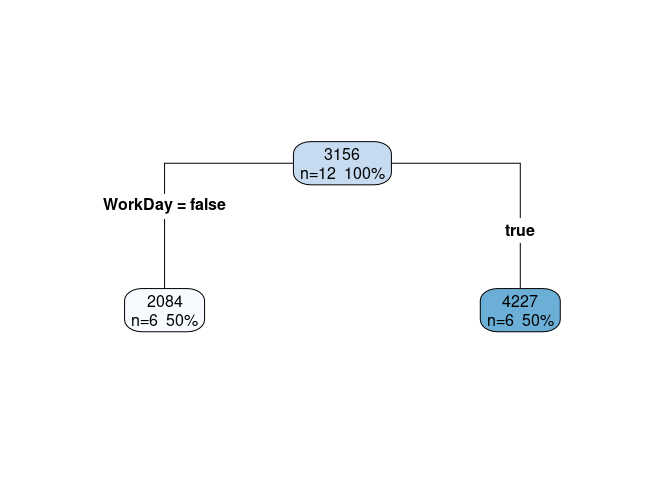

In [ ]:
control <- rpart.control(minbucket=1)
model <- rpart(Rentals~WorkDay, data=train, method="anova", control=control)
rpart.plot(model, type=4, extra=101)

### Testing Model 1

Lets do our predictions for this model:

In [ ]:
pred <- predict(model, newdata = test, type = 'vector')

Lets build a data frame so we can see the predictions and the actuals

In [ ]:
info <- data.frame(actual=test$Rentals, predictions=pred)
print(info)

  actual predictions
1    850        2084
2    921        4227
3   2412        2084
4   4713        4227
5   2500        2084
6   5893        4227
7   3200        2084
8   2935        4227

Lets calculate the MAPE, MAE, and RMSE

In [ ]:
mape(test$Rentals,pred)

[1] 0.8148

[1] 1230

[1] 1527

## Model 2 Rentals\~Season

Now lets try just using `Season` to predict the result `Rentals`

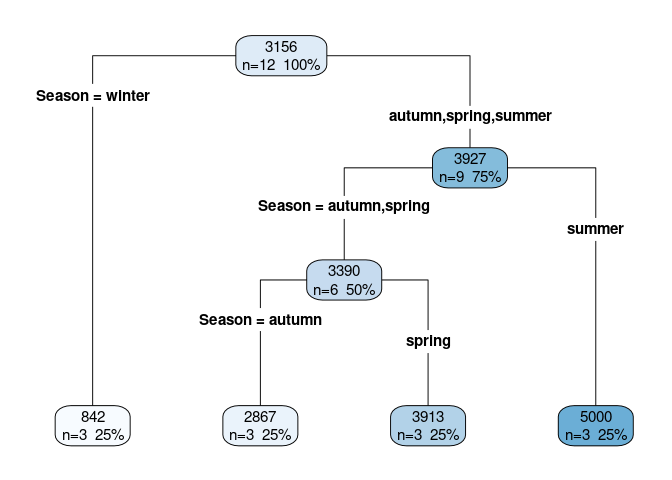

In [ ]:
control <- rpart.control(minbucket=1)
model <- rpart(Rentals~Season, data=train, method="anova", control=control)
rpart.plot(model, type=4, extra=101)

### Testing Model 2

Lets do our predictions for this model:

In [ ]:
pred <- predict(model, newdata = test, type = 'vector')

Lets build a data frame so we can see the predictions and the actuals

In [ ]:
info <- data.frame(actual=test$Rentals, predictions=pred)
print(info)

  actual predictions
1    850         842
2    921         842
3   2412        3913
4   4713        3913
5   2500        5000
6   5893        5000
7   3200        2867
8   2935        2867

Lets calculate the MAPE, MAE, and RMSE

In [ ]:
mape(test$Rentals,pred)

[1] 0.2708

[1] 772.8

[1] 1122

## Model 3 Rentals\~Season+WorkDay

Now lets build a model using `Season` and `WorkDay` to predict `Rentals`

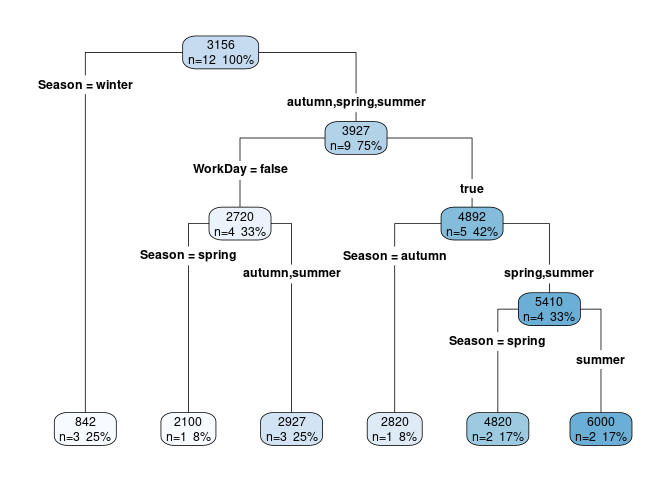

In [ ]:
control <- rpart.control(minbucket=1)
model <- rpart(Rentals~Season+WorkDay, data=train, method="anova", control=control)
rpart.plot(model, type=4, extra=101)

### Testing Model 3

Lets do our predictions for this model:

In [ ]:
pred <- predict(model, newdata = test, type = 'vector')

Lets build a data frame so we can see the predictions and the actuals

In [ ]:
info <- data.frame(actual=test$Rentals, predictions=pred)
print(info)

  actual predictions
1    850         842
2    921         842
3   2412        2100
4   4713        4820
5   2500        2927
6   5893        6000
7   3200        2927
8   2935        2820

Lets calculate the MAPE, MAE, and RMSE

In [ ]:
mape(test$Rentals,pred)

[1] 0.07009

[1] 178.5

[1] 222.7